In [1]:
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Cargar datos de Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NLP/preprocessed_data.csv')





In [4]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment,tokens,trigrams,processed_reviews
0,A1JZFGZEZVWQPY,B00002N674,"Carter H ""1amazonreviewer@gmail . com""","[4, 4]",Good USA company that stands behind their prod...,4,Great Hoses,1308614400,"06 21, 2011",1,"['good', 'usa', 'company', 'that', 'stands', '...","[('good', 'usa', 'company'), ('usa', 'company'...",good usa company stand behind product warranty...
1,A32JCI4AK2JTTG,B00002N674,"Darryl Bennett ""Fuzzy342""","[0, 0]",This is a high quality 8 ply hose. I have had ...,5,Gilmour 10-58050 8-ply Flexogen Hose 5/8-Inch ...,1402272000,"06 9, 2014",1,"['this', 'is', 'a', 'high', 'quality', '8', 'p...","[('this', 'is', 'a'), ('is', 'a', 'high'), ('a...",high quality ply hose good luck gilmour hose p...
2,A3N0P5AAMP6XD2,B00002N674,H B,"[2, 3]",It's probably one of the best hoses I've ever ...,4,Very satisfied!,1336176000,"05 5, 2012",1,"['it', ""'s"", 'probably', 'one', 'of', 'the', '...","[('it', ""'s"", 'probably'), (""'s"", 'probably', ...",probably one best hose ive ever hadpros good e...
3,A2QK7UNJ857YG,B00002N674,Jason,"[0, 0]",I probably should have bought something a bit ...,5,Very high quality,1373846400,"07 15, 2013",1,"['i', 'probably', 'should', 'have', 'bought', ...","[('i', 'probably', 'should'), ('probably', 'sh...",probably bought something bit flexible less ru...
4,AS0CYBAN6EM06,B00002N674,jimmy,"[1, 1]",I bought three of these 5/8-inch Flexogen hose...,5,Good Hoses,1375660800,"08 5, 2013",1,"['i', 'bought', 'three', 'of', 'these', '5/8-i...","[('i', 'bought', 'three'), ('bought', 'three',...",bought three inch flexogen hose feetfor differ...


In [6]:
from sklearn.utils import resample


print(df['sentiment'].value_counts())

df_positivas = df[df['sentiment'] == 1]
df_negativas = df[df['sentiment'] == 0]

# Undersampling
df_positivas_undersampled = resample(df_positivas, replace=False, n_samples=len(df_negativas), random_state=42)

df_balanced = pd.concat([df_negativas, df_positivas_undersampled])

print(df_balanced['sentiment'].value_counts())

# Dividimos entre train y test (80% train, 20% test)
X = df_balanced['processed_reviews']
y = df_balanced['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print("Distribución en train:", y_train.value_counts())
print("Distribución en test:", y_test.value_counts())

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
print(X_train.shape)
print(X_test.shape)



sentiment
1    10421
0     2851
Name: count, dtype: int64
sentiment
0    2851
1    2851
Name: count, dtype: int64
Distribución en train: sentiment
1    2281
0    2280
Name: count, dtype: int64
Distribución en test: sentiment
0    571
1    570
Name: count, dtype: int64
(4561, 1)
(1141, 1)


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


X_train = X_train.squeeze().fillna("")
X_test = X_test.squeeze().fillna("")

# Bag of Words
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

print("Shape X_train BoW:", X_train_bow.shape)
print("Shape X_test BoW:", X_test_bow.shape)

Shape X_train BoW: (4561, 5000)
Shape X_test BoW: (1141, 5000)


In [8]:
X_train_bow = X_train_bow.toarray()
X_test_bow = X_test_bow.toarray()

# Regresión Logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_bow, y_train)
y_pred_logreg = logreg.predict(X_test_bow)

#SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_bow, y_train)
y_pred_svm = svm.predict(X_test_bow)

# Evaluación de modelos
print("Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))

print("SVM:")
print(classification_report(y_test, y_pred_svm))


Regresión Logística:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       571
           1       0.72      0.71      0.72       570

    accuracy                           0.72      1141
   macro avg       0.72      0.72      0.72      1141
weighted avg       0.72      0.72      0.72      1141

SVM:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       571
           1       0.68      0.68      0.68       570

    accuracy                           0.68      1141
   macro avg       0.68      0.68      0.68      1141
weighted avg       0.68      0.68      0.68      1141



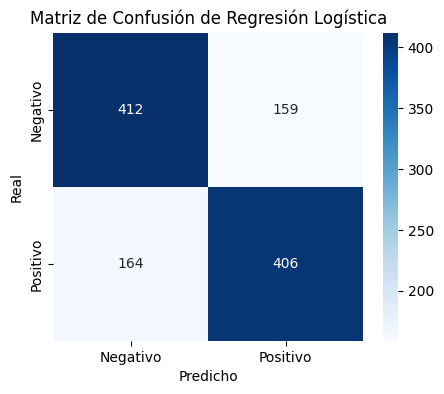

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión de Regresión Logística")
plt.show()


Conclusiones:
- Regresión Logística supera a SVM en todas las métricas, lo que indica que es un mejor modelo para esta tarea.
- El modelo logra una precisión del 72%, lo cual es aceptable para una tarea de clasificación de sentimientos en texto.
- El balance de clases ha permitido que el modelo no tenga sesgo hacia una categoría.
-Podriamos intentar mejorar los resultados probando con TF-IDF en lugar de Bag-of-Words.